## SBBGCA usage
Usage of SBBGCA.ipynb

### Set Variable 
set variables before running codes:
data_directory, tag, outputPath

### Want to get clustering results
##### run startClustering() function.

It call do_SBBGCA_clustering() function in SBBGAC.ipynb which output 2 results : intermediatePool, initialNames.

##### intermediatePool: the intermediates of clustering which is a dict
##### initialNames: a dict which contains the original names of basic group(start from G0 to G_inputHooklogNumber)

in the startClustering() function will output 2 pickles to outputPath which helping further usage.
(Because the performance of SBBGCA is terrible Q_Q)

### Want to draw hierarchy graph of clustering result
##### run drawClusteringResults() function.

It read the pickles of clustering results and draw graphs using matplotlib.

In [1]:
# basic global inputs variable

data_directory = "hooklogs/allaple_woj_g_98/"
tag = "allaple_woj_g_98"  # used for pickle name
outputPath = "output/SBBGCA_Clustering/allaple_woj_g_98/"

In [2]:
# reverse clusterID by hooklogName

def findClusterID(nameDict, hooklogName):
    for key, value in nameDict.items():
        if(value == hooklogName):
            return key
    return hooklogName

In [3]:
def getInitialNameDict(initialDict):
    nameDict = dict()
    for key, value in initialDict.items():
        name = value[0]
        nameDict[key] = name
    return nameDict

In [4]:
# convert memberSet to List type

def getMemberList(memberSet, nameDict):
    memberList = list()
    while(len(memberSet)>0):
        member = memberSet.pop()
        clusterID = findClusterID(nameDict, member)
        memberList.append(clusterID)
    return memberList

In [5]:
# z[0] = g1,  z[1] = g2,  z[2] = 高度
# Create structure Z

def createStructZ(intermediate_dict, nameDict):
    import numpy as np
    Z = np.zeros((len(intermediate_dict) ,4))
    
    intermediate_list = sorted(intermediate_dict.items(), key=lambda x:x[0])
    
    iterCounter = 0
    for item in intermediate_list:
        value = item[1] # get original dict value
        score = value[0]
        height = 1 - score # get cluster distance
        clusterName = value[1][0]
        memberSet = value[2] # members set
        memberList = getMemberList(memberSet, nameDict)
        print(clusterName, " : ", memberList)
        member1 = memberList[0][1::]
        member2 = memberList[1][1::]
        
        Z[iterCounter] = [member1, member2, height, len(memberList)] # set Z element
        iterCounter+=1
        
    return Z

In [6]:
def createLabelList(nameDict):
    dict_keys = list(nameDict.keys())
    dict_keys.sort(key=lambda tup: int(tup[1::] )) # sort keys by number in clusterName (i.e., '31' in 'G31')
    
    labelList = list()
    for key in dict_keys:
        labelList.append( nameDict[key] )
    
    return labelList

In [7]:
# do clustering and output two pickle files. (@_intermediate.pickle and @_nameDict.pickle)
% run SBBGCA.ipynb

def startClustering(data_directory, tag, outputPath):
    if not os.path.isdir(outputPath): os.makedirs(outputPath) # create output path Directory
    
    intermediatePool, initialDict, roundInfos = do_SBBGCA_clustering(data_directory, tag, outputPath)

    # saving intermediatePool as pickle file
    if not os.path.isdir(outputPath): os.makedirs(outputPath)
    with open(outputPath + tag + '_intermediate.pickle', 'wb') as handle:
        pickle.dump(intermediatePool, handle, protocol=pickle.HIGHEST_PROTOCOL)

    # saving initialNames dict as pickle file
    with open(outputPath + tag + '_initialDict.pickle', 'wb') as handle:
        pickle.dump(initialDict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    # saving round information dict as pickle file
    with open(outputPath + tag + '_roundInfos.pickle', 'wb') as handle:
        pickle.dump(roundInfos, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
# draw pics

def drawClusteringResults(outputPath, tag, upgma_threshold):
    
    #     Dependencies
    import pickle
    import scipy
    import scipy.cluster.hierarchy as sch
    import matplotlib.pylab as plt
    %matplotlib inline
    
    # read the results from pickle files
    with open(outputPath + tag + '_intermediate.pickle', 'rb') as handle:
        intermediate = pickle.load(handle)
    with open(outputPath + tag + '_initialDict.pickle', 'rb') as handle:
        initialDict = pickle.load(handle)
    with open(outputPath + tag + '_roundInfos.pickle', 'rb') as handle:
        roundInfos = pickle.load(handle)
        
    initialNameDict = getInitialNameDict(initialDict)
    print("Original Names : ", initialNameDict)
    print("round informations", roundInfos)
    
    # It have to create the Z structure for drawing purpose.
    Z = createStructZ(intermediate, initialNameDict)
    
    label_list = createLabelList(initialNameDict) # create graph labels by nameDict

    (orig_x, orig_y) = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = (6, 10) #---input

    # P = sch.dendrogram(Z, color_threshold = upgma_threshold, orientation = 'right') # no label
    P = sch.dendrogram(Z, color_threshold = upgma_threshold, labels = label_list, orientation = 'right')

#     plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')
    locs, labels = plt.yticks()
    # plt.xticks(  np.arange(0,1.1,0.1)) #---Align axis-x 900(0, 0.35, 0.05) 909(0,0.6,0.1) 855(0, 0.9, 0.1)
    plt.setp(labels, fontsize = 14)
    plt.tight_layout()

    plt.rcParams['figure.figsize'] = (orig_x, orig_y)
    plt.savefig(outputPath+'SBBGCA_'+tag+'.pdf', dpi=300)

In [9]:
# usage example of get clustering results

import datetime
date_time = datetime.datetime.now()
print(date_time.strftime("%Y-%b-%d %H:%M"))

startClustering(data_directory, tag, outputPath)
    
date_time = datetime.datetime.now()
print(date_time.strftime("%Y-%b-%d %H:%M"))

2017-Sep-07 01:28
-- Finish Initializing --
-- Start Clustering --
-- Finish Clustering --
2017-Sep-07 01:30


Original Names :  {'G0': '0316c4_3320', 'G1': '08d0f7_3308', 'G2': '245b08_3284', 'G3': '28efa1_3272', 'G4': '2fbc8c_3284', 'G5': '31260c_3176', 'G6': '329d35_3328', 'G7': '329d35_3384', 'G8': '405c75_3248', 'G9': '4ab715_3208', 'G10': '4b9f98_3056', 'G11': '6546cc_3184', 'G12': '6f73aa_3392', 'G13': '73d1ab_3260', 'G14': '7a28c0_3208', 'G15': '802d6c_3300', 'G16': '8d2207_3344', 'G17': '9f8b03_3408', 'G18': 'a3a37b_3332', 'G19': 'aa634c_3232', 'G20': 'b04e89_3176', 'G21': 'b60814_2840', 'G22': 'b71a4a_3256', 'G23': 'bd9a4b_3400', 'G24': 'bdf002_3304', 'G25': 'c6d288_3216', 'G26': 'd4743b_3304', 'G27': 'd6d1ed_3360', 'G28': 'e0428e_3252', 'G29': 'e26147_3260', 'G30': 'fb4273_3224', 'G31': 'fe7658_3224'}
round informations {0: ['G0', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31'], 1: ['G32', 'G33', 'G34', 'G35', 'G36', 'G37'], 2

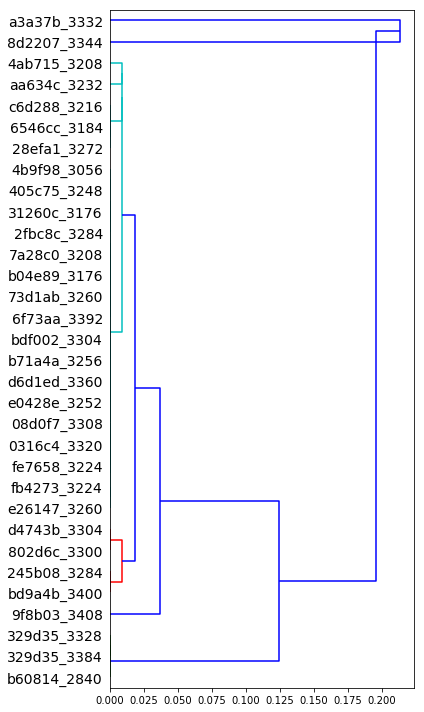

In [10]:
# usage example of draw hierarchy graph of clustering results

drawClusteringResults(outputPath, tag, 0.01)